In [ ]:
from IPython.display import Image
from IPython.display import clear_output
from IPython.display import FileLink, FileLinks

## Introduction to

![title](img/python-logo-master-flat.png)

### for scientific computing

#### - Lecture 8

### Latest Exercise


Create a movie picker function. The function will pick the first movie that fits the user's requirements
and print its title. The user can choose to pick a movie based on one or more of the four requirements 

`year`, `genre`, `minimal rating` or `maximal rating`.

`>>> pick_movie(genre="Drama")`

`The Paths of Glory`

`>>> pick_movie(year=2001)`

`Donnie Darko`

`>>> pick_movie(rating_min=8)`

`Paths of Glory`

`>>> pick_movie(year=2009, genre="Mystery")`

`The Secret in Their Eyes`

### What you needed to do

* pick_movie must be a function!
* A script (.py) was not necessary, parameters can be set in the notebook
* Parameters must be `None` by default so that they are optional
* The function must be able to evaluate only those parameters that are not `None`

In [ ]:
# notice how I pass movie_dict as argument instead of using the global variable
def pick_movie(movie_dict, genre=None, year=None, min_rating=None, max_rating=None):
        for movie in movie_dict:
            # keep track if a movie should be picked, start as true and negate if it doesn't match.
            pick = True
            current_info = movie_dict[movie]
            current_genres = current_info[0]
            current_year = current_info[1]
            current_rating = current_info[2]

            if genre is not None and genre not in current_genres:
                pick = False
            if year is not None and year != current_year:
                pick = False
            if min_rating is not None and min_rating > current_rating:
                pick = False
            if max_rating is not None and current_rating > max_rating:
                pick = False
            
            if pick:
                print(f"one movie matches all criteria: '{movie}' {current_info}")
                return # need to exit now to avoid running the following print

        print(f"No movie matches all criteria :(")
        return # not necessary, will exit anyway

movies_by_title = {}

movie_file = open("../downloads/250.imdb", "r")
for movie in movie_file:
    if not movie.startswith("#"):
        movie = movie.strip()
        movie_split = movie.split("|")
        rating = float(movie_split[1])
        year = int(movie_split[2])
        genres = movie_split[5].lower()
        title = movie_split[6]

        movies_by_title[title] = (genres, year, rating)
movie_file.close()

pick_movie(movies_by_title, year=1957, min_rating=8.6)

In [ ]:
# *** more advanced solution ***
def pick_movie(movie_dict, genre=None, year=None, min_rating=None, max_rating=None):
        for movie in movie_dict:
            # when you know how many elements in each tuple/list, you
            # can unpack them directly to each variable like so:
            (current_genres, current_year, current_rating) = movie_dict[movie]
            
            # if the movie doesn't match, skip to next movie in loop
            if genre is not None and genre not in current_genres:
                # continue statement interrupts this iteration (does not run following ifs)
                #  and skips to the next iteration (next movie in dictionary)
                continue
            if year is not None and year != current_year:
                continue
            if min_rating is not None and min_rating > current_rating:
                continue
            if max_rating is not None and current_rating > max_rating:
                continue
            
            print(f"one movie matches all criteria: '{movie}' {movie_dict[movie]}")
            return # need to exit now to avoid running the following print

        print(f"No movie matches all criteria :(")
        return # not necessary, will exit anyway

movies_by_title = {}

# instead of opening and closing the file, we can use the "with" statement.
# When the program exits the with block, the file is automatically closed
with open("../downloads/250.imdb", "r") as movie_file:
    for movie in movie_file:
        if not movie.startswith("#"):
            movie = movie.strip()
            movie_split = movie.split("|")
            rating = float(movie_split[1])
            year = int(movie_split[2])
            genres = movie_split[5].lower()
            title = movie_split[6]

            movies_by_title[title] = (genres, year, rating)

pick_movie(movies_by_title, year=1957, min_rating=8.6)

### New statements

* `continue`: interrupt the current iteration and skip to the next element in the loop (continue to next)
* `break`: terminate the whole for/while loop, run code following loop (break out of the loop)
* `return`: terminate the function, do not run anything else following (return from the function)
* `pass`: do nothing (pass!)

### Unpacking tuples

In [39]:
def return_two_values():
    return ("return1", "return2")

(element1, element2) = return_two_values()
print(element1, element2)

return1 return2


In [40]:
list_of_lists = [[1, 2], 
                 ["a", "b"], 
                 ["z", 4]]

for a_list in list_of_lists:
    (element1, element2) = a_list
    print(element1, element2)

1 2
a b
z 4


## With clause

* Whatever is indented will happen while the file is opened
* File is closed automatically
* Can be used also when writing

```py
with open("../downloads/250.imdb", "r") as movie_file:
    for movie in movie_file:
        ...
```

## Passing by reference vs. by value

* We have seen that naming global/local variables with the same name can cause issues
* If I am modifying the local variable in the function, am I modifying the global as well?
    * That depends on the type!
* It's ok if you don't remember exactly how it works, just that you understand the concept
    * This will save you some pain later

In [41]:
# if the type is not a collection,
# the function will work on a copy
# of the variable (pass by value)
global_variable = 5

def change_variable(var):
    var = 999

change_variable(global_variable)
print(global_variable)

5


In [42]:
# but if the type is a collection (list, dict)
# then the function will be passed a "reference"
# to the global object, so in the end the global
# object will change (pass by reference)
global_list = [1, 2, 3]

def change_list(li):
    li[0] = 999

change_list(global_list)
print(global_list)

[999, 2, 3]


In [ ]:
# NB: this applies only to MODIFYING the object.
# Replacing the list with a new one
# will generate a new object altogether
# so the original will not change!
global_list = [1, 2, 3]

def change_list(li):
    li = [999, 2, 3]

change_list(global_list)
print(global_list)

### Copies (values) and References

* Copying an object means writing an identical object to a separate memory location. This means that if passing by value, the function will modify a copy of the object, then the original will be left untouched

* References are like links pointing to the memory location where the original object was stored. Once the object is passed by reference (not by copy) the function will have access to that same memory space, and will be able to change it

<img src="img/pass-by-reference-vs-pass-by-value-animation.webp">

## This is not limited to functions!

If you try to make a copy of a list with the `=` operator, the new variable will be actually still a reference to the original!

In [107]:
some_list = [1, 2, 3]

# this is NOT a copy! It's a reference
another_list = some_list
another_list[0] = 999

print(some_list)

[999, 2, 3]


## You can make copies of collections too

In [43]:
# if you want to work on a copy of the
# object, you have to do so explicitly...
global_list = [1, 2, 3]

def change_list(li):
    li[0] = 999
    return li

# ... by calling the .copy() method
new_global_list = change_list(global_list.copy())
print(global_list)
print(new_global_list)

[1, 2, 3]
[999, 2, 3]


In [108]:
some_list = [1, 2, 3]

# this is a copy
yet_another_list = some_list.copy()
yet_another_list[0] = 999

print(some_list)

[1, 2, 3]


### A short note on code structure

- functions
- modules (files)
- documentation

#### Why functions?
- Cleaner code
- Better defined tasks in code
- Re-usability
- Better structure

#### Why modules?

- Cleaner code
- Better defined tasks in code
- Re-usability
- Better structure

- Collect all related functions in one file
- Import a module to use its functions
- Only need to understand what the functions do, not how

#### Example: **sys**

```py
import sys

sys.argv[1]
```
or

```py
import pprint
pprint.pprint(a_big_dictionary)
```

### Python standard modules

Check out the [module index](https://docs.python.org/3.6/py-modindex.html)

How to find the right module?

How to understand it?

How to find the right module?

- look at the module index
- search [PyPI](http://pypi.org)
- ask your colleagues
- search the web!

- Standard modules: no installation needed
- Other libraries: install with `pip install` or `conda install`

How to understand it?

In [44]:
import math

help(math.acosh)

Help on built-in function acosh in module math:

acosh(x, /)
    Return the inverse hyperbolic cosine of x.



In [ ]:
help(str)

In [46]:
help(math.sqrt)

Help on built-in function sqrt in module math:

sqrt(x, /)
    Return the square root of x.



In [ ]:
math.sqrt(3)

#### Importing

In [54]:
import math

math.sqrt(3)

1.7320508075688772

In [ ]:
import math as m
m.sqrt(3)

In [55]:
from math import sqrt
sqrt(3)

1.7320508075688772

In [ ]:
from pprint import pprint

### Documentation and commenting your code


Remember `help()`?

Works because somebody else has documented their code!

In [56]:
def process_file(filename, chrom, pos):
    """
    Read a vcf file, search for lines matching
    chromosome chrom and position pos.

    Print the genotypes of the matching lines.
    """
    for line in open(filename):
        if not line.startswith('#'):
            col = line.split('\t')
            if col[0] == chrom and col[1] == pos:
                print(col[9:])

In [57]:
help(process_file)

Help on function process_file in module __main__:

process_file(filename, chrom, pos)
    Read a vcf file, search for lines matching
    chromosome chrom and position pos.
    
    Print the genotypes of the matching lines.



Your code may have two types of users:

- library users
- maintainers (maybe yourself!)

Write documentation for both of them!

- library users (docstrings):
  ```python
  """
  What does this function do?
  """
  ```
- maintainers (comments):
  ```python
  # implementation details
  ```

In [ ]:
def process_file(filename, chrom, pos):
    """Read a vcf file, search for lines matching 
    chromosome chrom and position pos.

    Print the genotypes of the matching lines.
    """
    for line in open(filename):
        if not line.startswith('#'):  # skip comments
            col = line.split('\t')  # file is tab separated
            # Check if chrom and pos match
            if col[0] == chrom and col[1] == pos:
                # genotype starts at column index 9
                print(col[9:])

#### Documentation:

- At the beginning of the file

   ```python
   """
   This module provides functions for...
   """
   ```

- For every function

    ```python
    def make_list(x):
        """Returns a random list of length x."""
        ...
    ```

#### Comments:

 - Wherever the code is hard to understand
 - Explain why, not what


* Bad comment:

```py
while counter < max:
    ...
    counter += 1  # increment the counter
```

* Good comment:

```py
while counter < max:
    ...
    counter += 1  # ensures the while loop terminates
```

### Read more:

https://realpython.com/documenting-python-code/

https://www.python.org/dev/peps/pep-0008/?#comments

# Pandas! (not the animal)

<img src="img/pandas_animals.jpeg"/>

### Pandas
- Library for working with tabular data
- Data analysis: 
   - filter
   - transform
   - aggregate
   - plot
- Main hero: the `DataFrame` type:


![01_table_dataframe1](img/01_table_dataframe1.png)

#### Creating a small DataFrame

In [58]:
import pandas as pd
df = pd.DataFrame({
    'age': [1,2,3,4],
    'circumference': [2,3,5,10],
    'height': [30, 35, 40, 50]
})
df

,age,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


#### Pandas can import data from many formats

- `pd.read_table`: tab separated values `.tsv`
- `pd.read_csv`: comma separated values `.csv`
- `pd.read_excel`: Excel spreadsheets `.xlsx`

- For a data frame `df`: `df.write_table()`, `df.write_csv()`, `df.write_excel()`

![test](img/02_io_readwrite.png)

#### Orange tree data

In [59]:
!cat ../downloads/Orange_1.tsv

age	circumference	height
1	2	30
2	3	35
3	5	40
4	10	50


In [105]:
df = pd.read_table('../downloads/Orange_1.tsv') 
df

,age,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


- One implict index (0, 1, 2, 3)
- Columns: `age`, `circumference`, `height`
- Rows: one per data point, identified by their index

#### Selecting columns from a dataframe
```py
dataframe.columnname
dataframe['columnname']
```

![03_subset_columns](img/03_subset_columns.png)

In [61]:
df.columns

Index(['age', 'circumference', 'height'], dtype='object')

In [66]:
df2 = df[['height', 'age']]
df2

,height,age
0,30,1
1,35,2
2,40,3
3,50,4


In [64]:
df.height

0    30
1    35
2    40
3    50
Name: height, dtype: int64

## NB: reference or value?

When subsetting a pandas DataFrame, the result will be a reference to the original dataframe. So if you modify `df.height` the change will reflect on the original dataFrame

In [106]:
heights = df.height
heights[0] = 200

df

,age,circumference,height
0,1,2,200
1,2,3,35
2,3,5,40
3,4,10,50


#### Calculating aggregated summary statistics

![06_reduction](img/06_reduction.png)

In [67]:
df[['age', 'circumference']].describe()

,age,circumference
count,4.000000,4.000000
mean,2.500000,5.000000
std,1.290994,3.559026
min,1.000000,2.000000
25%,1.750000,2.750000
50%,2.500000,4.000000
75%,3.250000,6.250000
max,4.000000,10.000000


In [68]:
df['age'].std()

1.2909944487358056

In [69]:
df['age'].max()

4

#### Creating new column derived from existing column

![05_newcolumn_1](img/05_newcolumn_1.png)

In [70]:
import math
df['radius'] = df['circumference'] / 2.0 / math.pi
df

,age,circumference,height,radius
0,1,2,30,0.318310
1,2,3,35,0.477465
2,3,5,40,0.795775
3,4,10,50,1.591549


#### Selecting rows from a dataframe by index
```py
dataframe.iloc[index]
dataframe.iloc[start:stop]
```

![03_subset_rows](img/03_subset_rows.png)

In [73]:
df.iloc[1:3]

,age,circumference,height,radius
1,2,3,35,0.477465
2,3,5,40,0.795775


#### Slightly bigger data frame of orange trees 

In [78]:
!head -n 5 ../downloads/Orange.tsv
#!wc -l ../downloads/Orange.tsv

Tree	age	circumference
1	118	30
1	484	58
1	664	87
1	1004	115


In [79]:
df = pd.read_table('../downloads/Orange.tsv')
df.iloc[0:5]  # can also use .head()

,Tree,age,circumference
0,1,118,30
1,1,484,58
2,1,664,87
3,1,1004,115
4,1,1231,120


In [86]:
#df.Tree.unique()
df["Tree"].unique()

array([1, 2, 3])

In [ ]:
type(pd.DataFrame({"genre": ['Thriller', 'Drama'], "rating": [10, 9]}).rating.iloc[0])

In [ ]:
#young = df[df.age < 200]
#young
df[df.age < 1000]

#### Finding the maximum and then filter by it

```py
df[ df.age < 200 ]
```

In [ ]:
df.head()

In [87]:
max_c = df.circumference.max()
print(max_c)

203


In [88]:
df[df.circumference == max_c]

,Tree,age,circumference
12,2,1372,203
13,2,1582,203


## Exercise

Here's a dictionary of students and their grades:
```
students = {'student': ['bob', 'sam', 'joe'], 'grade': [1, 3, 4]}
```
Use Pandas to:
- create a dataframe with this information
- get the mean value of the grades

In [ ]:
import pandas as pd

students = {'student': ['bob', 'sam', 'joe'], 'grade': [1, 3, 4]}

df = pd.DataFrame(students)

df.grade.mean()
# df['grade'].mean()

### Plotting
```py
df.columnname.plot()
```

<AxesSubplot:xlabel='age'>

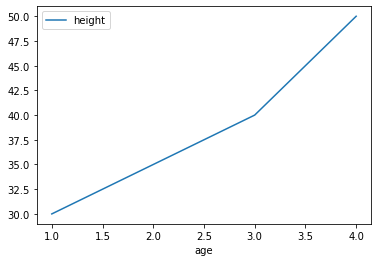

In [89]:
small_df = pd.read_table('../downloads/Orange_1.tsv')
small_df.plot(x='age', y='height')

#### Plotting

What if no plot shows up?

```py
%pylab inline   # jupyter notebooks
```
or
```py
import matplotlib.pyplot as plt

plt.show()
```

#### Plotting - bars

- Plot a bar chart

In [ ]:
df[['circumference', 'age']].plot(kind='bar')

<AxesSubplot:>

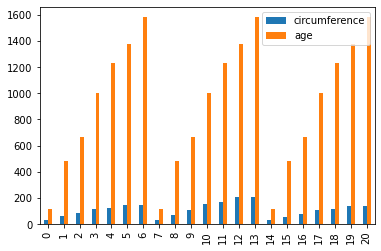

In [90]:
df[['circumference', 'age']].plot(kind='bar')

<AxesSubplot:>

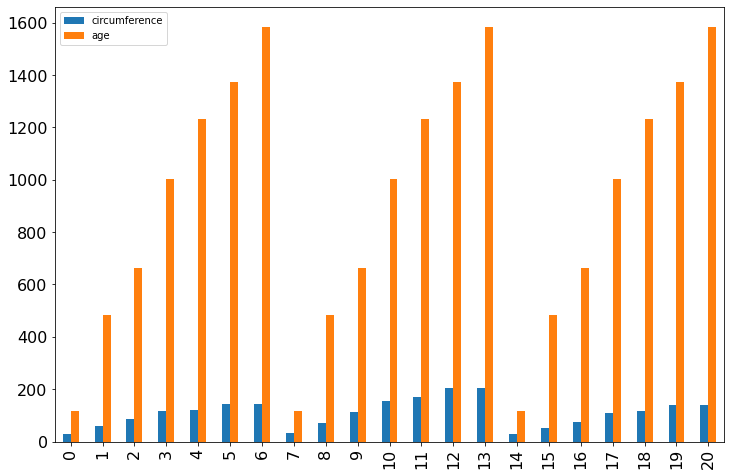

In [91]:
df[['circumference', 'age']].plot(kind='bar', figsize=(12, 8), fontsize=16)

#### Scatterplot

```py
    df.plot(kind="scatter", x="column_name", y="other_column_name")
```

<AxesSubplot:xlabel='age', ylabel='circumference'>

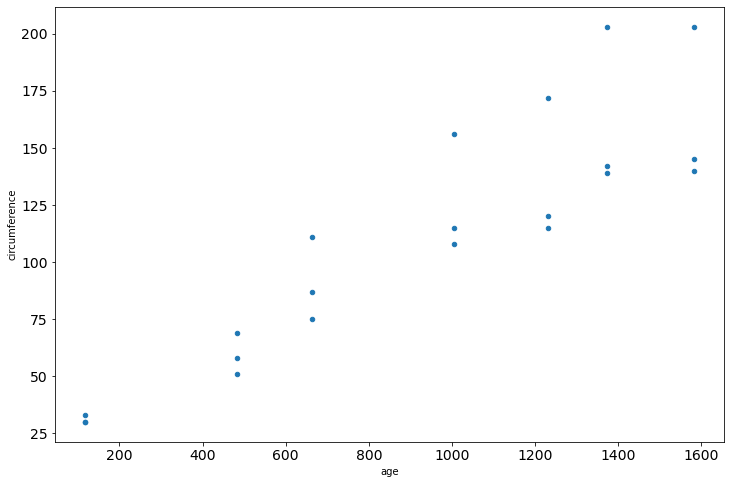

In [92]:
df.plot(kind="scatter", x='age', y='circumference',
        figsize=(12, 8), fontsize=14)

#### Line plot
```py
dataframe.plot(kind="line", x=..., y=...)
```

<AxesSubplot:xlabel='age'>

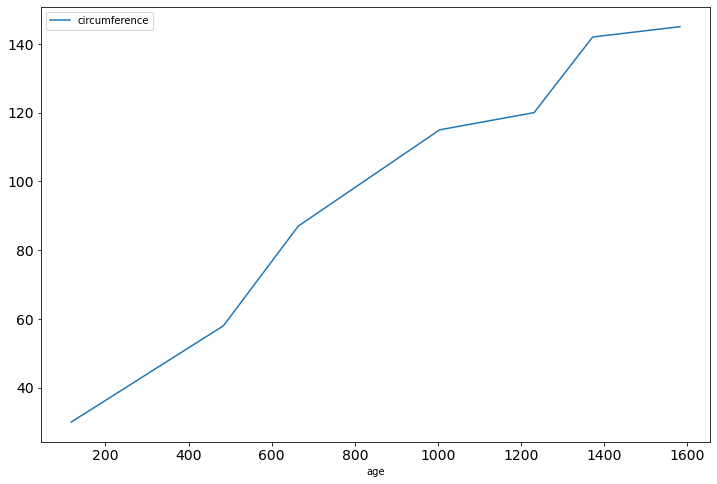

In [95]:
tree1 = df[df['Tree'] == 1]
tree1.plot(kind="line", x='age', y='circumference',
           fontsize=14, figsize=(12,8))